# Carregando fotos a partir de diretorio

## Etapa 1 - Importando as bibliotecas

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile

cv2.__version__

'4.1.2'

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

TensorFlow 2.x selected.


'2.0.0'

## Etapa 2 - Conectando com o Drive e acessando os arquivos

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/My Drive/Material.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")

In [ ]:
base_imgs = '/content/gdrive/My Drive/Cursos/Deteccao_Expressoes_Faciais/emotiondetect_teste_.zip'
zip_object = zipfile.ZipFile(file = base_imgs, mode = "r")
zip_object.extractall("./")
zip_object.close()

## Etapa 3 - Acessando a base com fotos de expressões faciais



In [ ]:
import glob

diretorio = 'gdrive/My Drive/Cursos/Deteccao_Expressoes_Faciais/' # diretorio onde estão os arquivos do curso

diretorio_treinamento = diretorio + 'fer2013/train/'

Por exemplo: no diretório, deixa as imagens organizadas nesse formato abaixo, com uma pasta para cada emoção diferente.

![alt text](https://drive.google.com/uc?id=1eZn5AF31VYKDAEUGJIX6bdOJSw2VQDio)

In [ ]:
# aqui vamos adicionar todas as emoções, que correspondem a cada uma das pastas dentro do diretorio_treinamento
classes = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] 
# (antes tinha a pasta Disgust mas nessa demonstração resolvemos remover pois tinha poucas imagens)
# Obs: deixar os items da lista na ordem desejada (exemplo: Angry será a emoção com id 0)

total = []        # variavel que irá conter o diretório de todas as imagens da pasta
emotions = []     # lista das emoções
nome_img = []     # lista com o nome das imagens (apenas para visualizar na tabela)
nome_emotion = [] # lista das emoções mas nome ao invés de id (apenas para visualizar na tabela) 


maximo_fotos = 3000 # (opcional) define o numero máximo de fotos que serão carregadas do diretório para cada classe

for i, classe in enumerate(classes):
  imgs_treinamento = glob.glob(diretorio_treinamento + classe + "/*") # verifica todos os arquivos dentro da pasta 

  a = 0   # variavel auxiliar para controlar dentro do for quantas fotos serão carregadas para cada emoção
  ### isso é opcional. nesse exemplos limitamos para 2000 fotos (total 12000) pois se fossem todas ia levar muito tempo
  ### se for carregar todas as fotos deixe a = 99999 por exemplo ou remova o (if a >= maximo_fotos: break)

  for img in imgs_treinamento:
    total.append(img);
    nome_img.append(str(img.split("/")[-1]))
    emotions.append(i)
    nome_emotion.append(classe)
    a = a+1
    if a >= maximo_fotos:
      break

  #imgs_treinamento.remove(diretorio_treinamento + classe + '\\Thumbs.db')
  print("Numero de imagens com a emoção "+ classe +" = "+str(len(imgs_treinamento)))


dataset = pd.DataFrame()

dataset["img"] = nome_img
dataset["emotion"] = emotions
dataset["class"] = nome_emotion

Numero de imagens com a emoção Angry = 3995
Numero de imagens com a emoção Fear = 4097
Numero de imagens com a emoção Happy = 7215
Numero de imagens com a emoção Sad = 4830
Numero de imagens com a emoção Surprise = 3171
Numero de imagens com a emoção Neutral = 4965


In [ ]:
print(dataset)

            img  emotion    class
0      3694.jpg        0    Angry
1      3695.jpg        0    Angry
2      3696.jpg        0    Angry
3      3697.jpg        0    Angry
4      3698.jpg        0    Angry
...         ...      ...      ...
17995  3662.jpg        5  Neutral
17996  3663.jpg        5  Neutral
17997  3664.jpg        5  Neutral
17998  3665.jpg        5  Neutral
17999  3666.jpg        5  Neutral

[18000 rows x 3 columns]


Observação: provavelmente vai demorar alguns minutos, o que é normal (pense que pelo CSV a gente acessa um arquivo só, agora estamos acessando milhares)

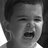

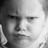

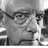

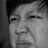

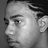

200 fotos carregadas [+ 0.61s]
400 fotos carregadas [+ 102.48s]
600 fotos carregadas [+ 102.67s]
800 fotos carregadas [+ 103.91s]
1000 fotos carregadas [+ 102.78s]
1200 fotos carregadas [+ 97.27s]
1400 fotos carregadas [+ 95.03s]
1600 fotos carregadas [+ 97.9s]
1800 fotos carregadas [+ 98.5s]
2000 fotos carregadas [+ 100.63s]
2200 fotos carregadas [+ 101.48s]
2400 fotos carregadas [+ 103.21s]
2600 fotos carregadas [+ 101.44s]
2800 fotos carregadas [+ 107.97s]
3000 fotos carregadas [+ 103.6s]
3200 fotos carregadas [+ 101.36s]
3400 fotos carregadas [+ 129.09s]
3600 fotos carregadas [+ 101.05s]
3800 fotos carregadas [+ 96.33s]
4000 fotos carregadas [+ 97.9s]
4200 fotos carregadas [+ 101.2s]
4400 fotos carregadas [+ 97.47s]
4600 fotos carregadas [+ 96.32s]
4800 fotos carregadas [+ 96.2s]
5000 fotos carregadas [+ 97.95s]
5200 fotos carregadas [+ 96.4s]
5400 fotos carregadas [+ 94.6s]
5600 fotos carregadas [+ 94.57s]
5800 fotos carregadas [+ 94.29s]
6000 fotos carregadas [+ 97.31s]
6200 foto

In [ ]:
from PIL import Image
import time

largura, altura = 48, 48

faces = []
amostras = 0 
t = time.time()
t_total = time.time()

for face in total:
  #imagem = Image.open(face).convert('L')
  imagem = cv2.imread(face, 0)
  imagem = np.asarray(imagem).reshape(largura, altura) 
  #imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  imagem = cv2.resize(imagem, (largura, altura))

  amostras = amostras + 1
  faces.append(imagem)

  if (amostras % 200 == 0): # pra mostrar o progresso
    print(str(amostras) + " fotos carregadas [+ " + str(round(time.time() - t, 2)) + "s]")
    t = time.time()
  
  if (amostras <= 5):
    cv2_imshow(imagem) # exibe as primeiras 5 imagens só, pra não sobrecarregar o colab

print("Tempo total: " + str(time.time() - t_total))


(Uma alternativa é salvar as imagens carregadas em um arquivo .hdf5, pois assim se você for treinar depois novamente será preciso apenas carregar um único grande arquivo ao invés de milhares, o que irá tornar o processo mais rápido em treinamentos futuros. Veja como é possível fazer: http://machinelearninguru.com/deep_learning/data_preparation/hdf5/hdf5.html)

In [ ]:
len(faces)

18000

In [ ]:
dataset.head()

,img,emotion,class
0,3694.jpg,0,Angry
1,3695.jpg,0,Angry
2,3696.jpg,0,Angry
3,3697.jpg,0,Angry
4,3698.jpg,0,Angry


In [ ]:
dataset.tail()

,img,emotion,class
17995,3662.jpg,5,Neutral
17996,3663.jpg,5,Neutral
17997,3664.jpg,5,Neutral
17998,3665.jpg,5,Neutral
17999,3666.jpg,5,Neutral


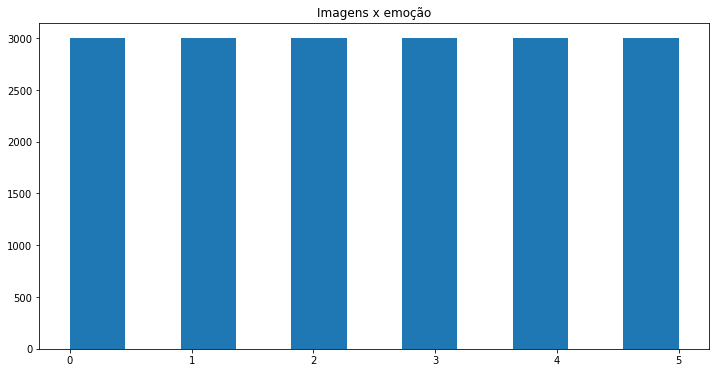

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(dataset['emotion'], bins=11)
plt.title("Imagens x emoção")
plt.show()

## Etapa 4 - Pré-processamento

In [ ]:
faces = np.asarray(faces) 
faces = np.expand_dims(faces, -1)

def normalizar(x):
    x = x.astype('float32')
    x = x / 255.0
    return x

faces = normalizar(faces)

#print(emotions)
#print(faces)
#print(emocoes)

In [ ]:
print("Número total de imagens no dataset: "+str(len(faces)))

Número total de imagens no dataset: 18000


In [ ]:
emocoes = pd.get_dummies(dataset['emotion']).as_matrix() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


## Etapa 5 - Imports do Tensorflow/Keras

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

## Etapa 6 - Dividir em conjuntos para treinamento e validação

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(faces, emocoes, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=41)

print("Número de imagens no conjunto de treinamento:", len(x_train))
print("Número de imagens no conjunto de testes:", len(x_test))
print("Número de imagens no conjunto de validação:", len(y_val))

Número de imagens no conjunto de treinamento: 14580
Número de imagens no conjunto de testes: 1800
Número de imagens no conjunto de validação: 1620


Você também pode fazer de forma manual a divisão entre conjunto de treinamento e validação, caso deseje. Para isso coloque em pastas separadas (exemplo: `train` e `validation`) e dentro desses diretórios deixe as fotos organizadas naquele formato com uma pasta para cada emoção.

In [ ]:
np.save(diretorio + 'mod_xtest_alt', x_test)
np.save(diretorio + 'mod_ytest_alt', y_test)

## Etapa 7 - Arquitetura do Modelo (CNN)

### Arquitetura do modelo

In [ ]:
num_features = 32
num_classes = 6
width, height = 48, 48
batch_size = 16
epochs = 70

model = Sequential()

model.add(Conv2D(num_features, (3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (width, height, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(num_features, (3, 3), padding = "same", kernel_initializer="he_normal", 
                 input_shape = (width, height, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*2*2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2*num_features, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2*num_features, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

## Etapa - Data Augmentation **(opcional)**

Execute a célula abaixo apenas caso queira usar Data Augmentation. Se formos gerar imagens com data augmentation lembre que usaremos o fit_generator(), ou seja, pode ser que demora bem mais pra treinar. Por isso recomendamos que se for o primeiro teste que estiver fazendo não use data augmentation. 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=10,
      shear_range=0.1,
      zoom_range=0.1,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

datagen = ImageDataGenerator() 

# A classe ImageDataGenerator do Keras retornará apenas os dados transformados aleatoriamente.
# Ou seja, as imagens originais não serão adicionadas, ou somadas junto às imagens geradas por transformações.

# É feito assim pois o objetivo da técnica é garantir que a rede neural veja "novas" imagens que nunca foram vistas antes em cada epoch.
# Se incluíssemos as imagens originais de treinamento junto com as imagens geradas em cada lote (batch), 
#    a rede "veria" os dados originais de treinamento várias vezes, o que não é o objetivo. 
# O objetivo geral do data augmentation é aumentar a generalização do modelo.
# Usando o data augmentation somos capazes de diminuir ou até mesmo previnir o overfitting (sobreajuste)

# Se o batch_size for 32 por exemplo, ImageDataGenerator () retorna 32 imagens aplicando transformações aleatórias usadas para treinar.
# Obs: as operações de aumento de dados são feitas na memória, então as imagens geradas são descartadas logo em seguida.

print(len(datagen.flow(x_train, y_train)))

456


Outra opção caso queira usar data augmentation é utilizar a função **flow_from_directory** (veja como utilizar: https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)

## Etapa 8 - Compilando o modelo 

In [ ]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
arquivo_modelo = diretorio + "modelo_02_expressoes_alt.h5" # arquivo do modelo
arquivo_modelo_json = diretorio + "modelo_02_expressoes_alt.json" # arquivo do json, para salvar a arquitetura
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

### Salvando a arquitetura do modelo em um arquivo JSON

In [ ]:
model_json = model.to_json()
with open(arquivo_modelo_json, "w") as json_file:
    json_file.write(model_json)

## Etapa 9 - Treinando o modelo

In [ ]:
np.array(x_train).shape # set de treinamento

(14580, 48, 48, 1)

**ATENÇÃO:** Abaixo, executar apenas um dos dois: **9.1** (sem data augmentation) ou **9.2** (com data augmentation). Caso você tenha escolhido usar data augmentation na etapa anterior então execute o código em **9.2** - caso contrário, execute o código em **9.1**.

### 9.1 - Treinamento sem data augmentation

In [ ]:
history = model.fit(np.array(x_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(x_val), np.array(y_val)),
          shuffle=True,
          callbacks=[lr_reducer, early_stopper, checkpointer])

Train on 14580 samples, validate on 1620 samples
Epoch 1/70
14576/14580 [============================>.] - ETA: 0s - loss: 2.0909 - accuracy: 0.2241
Epoch 00001: val_loss improved from inf to 1.61385, saving model to gdrive/My Drive/Cursos/Deteccao_Expressoes_Faciais/modelo_02_expressoes_alt.h5
14580/14580 [==============================] - 39s 3ms/sample - loss: 2.0909 - accuracy: 0.2241 - val_loss: 1.6138 - val_accuracy: 0.3265
Epoch 2/70
14576/14580 [============================>.] - ETA: 0s - loss: 1.6386 - accuracy: 0.3281
Epoch 00002: val_loss improved from 1.61385 to 1.38188, saving model to gdrive/My Drive/Cursos/Deteccao_Expressoes_Faciais/modelo_02_expressoes_alt.h5
14580/14580 [==============================] - 30s 2ms/sample - loss: 1.6385 - accuracy: 0.3282 - val_loss: 1.3819 - val_accuracy: 0.4556
Epoch 3/70
14576/14580 [============================>.] - ETA: 0s - loss: 1.4677 - accuracy: 0.4086
Epoch 00003: val_loss did not improve from 1.38188
14580/14580 [=============

### 9.2 - Treinamento com data augmentation

In [ ]:
# usarmos fit_generator() ao invés de fit() porque os dados de treinamento vieram de um gerador
history = model.fit_generator(
          datagen.flow(x_train, y_train, batch_size=batch_size),
          epochs=epochs,
          verbose=1,
          validation_data= (x_val, y_val),
          validation_steps = len(x_val) // batch_size, 
          steps_per_epoch = len(x_train) // batch_size,
          callbacks=[lr_reducer, early_stopper, checkpointer])

Epoch 1/70
910/911 [============================>.] - ETA: 0s - loss: 2.0749 - accuracy: 0.2196
Epoch 00001: val_loss improved from inf to 1.56310, saving model to gdrive/My Drive/Cursos/Deteccao_Expressoes_Faciais/modelo_02_expressoes_alt.h5
911/911 [==============================] - 77s 85ms/step - loss: 2.0744 - accuracy: 0.2198 - val_loss: 1.5631 - val_accuracy: 0.3568
Epoch 2/70
910/911 [============================>.] - ETA: 0s - loss: 1.6080 - accuracy: 0.3451
Epoch 00002: val_loss improved from 1.56310 to 1.37403, saving model to gdrive/My Drive/Cursos/Deteccao_Expressoes_Faciais/modelo_02_expressoes_alt.h5
911/911 [==============================] - 73s 80ms/step - loss: 1.6079 - accuracy: 0.3452 - val_loss: 1.3740 - val_accuracy: 0.4463
Epoch 3/70
910/911 [============================>.] - ETA: 0s - loss: 1.4505 - accuracy: 0.4234
Epoch 00003: val_loss improved from 1.37403 to 1.26782, saving model to gdrive/My Drive/Cursos/Deteccao_Expressoes_Faciais/modelo_02_expressoes_alt.

## Gerando gráfico da melhora em cada etapa do treinamento

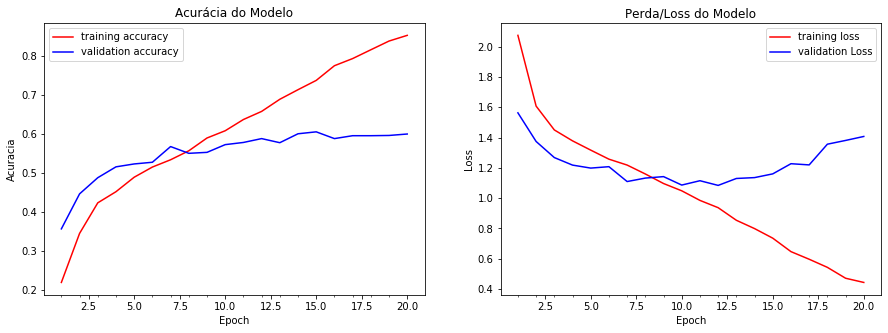

In [ ]:
def plota_historico_modelo(historico_modelo):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(historico_modelo.history['accuracy'])+1),
                historico_modelo.history['accuracy'],'r')
    axs[0].plot(range(1,len(historico_modelo.history['val_accuracy'])+1),
                historico_modelo.history['val_accuracy'],'b')
    axs[0].set_title('Acurácia do Modelo')
    axs[0].set_ylabel('Acuracia')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(historico_modelo.history['accuracy'])+1),
                      len(historico_modelo.history['accuracy'])/10)
    axs[0].legend(['training accuracy', 'validation accuracy'], loc='best')

    axs[1].plot(range(1,len(historico_modelo.history['loss'])+1),
                historico_modelo.history['loss'],'r')
    axs[1].plot(range(1,len(historico_modelo.history['val_loss'])+1),
                historico_modelo.history['val_loss'],'b')
    axs[1].set_title('Perda/Loss do Modelo')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(historico_modelo.history['loss'])+1),
                      len(historico_modelo.history['loss'])/10)
    axs[1].legend(['training loss', 'validation Loss'], loc='best')
    fig.savefig('historico_modelo_mod02_alt.png')
    plt.show()

plota_historico_modelo(history)

### Verificando a acurácia do modelo

In [ ]:
scores = model.evaluate(np.array(x_test), np.array(y_test), batch_size=batch_size)
print("Acurácia: " + str(scores[1]))
print("Perda/Loss: " + str(scores[0]))

1800/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Carregaremos os dados para gerar a matriz de confusão

In [ ]:
true_y=[]
pred_y=[]
x = np.load(diretorio + 'mod_xtest_alt.npy')
y = np.load(diretorio + 'mod_ytest_alt.npy')
json_file = open(arquivo_modelo_json, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(arquivo_modelo)
y_pred= loaded_model.predict(x)
yp = y_pred.tolist()
yt = y.tolist()
count = 0
for i in range(len(y)):
    yy = max(yp[i])
    yyt = max(yt[i])
    pred_y.append(yp[i].index(yy))
    true_y.append(yt[i].index(yyt))
    if(yp[i].index(yy)== yt[i].index(yyt)):
        count+=1
acc = (count/len(y))*100
np.save(diretorio + 'truey__mod_alt', true_y)
np.save(diretorio + 'predy__mod_alt', pred_y)
print("Acurácia no conjunto de testes: "+str(acc)+"%")

Acurácia no conjunto de testes: 58.88888888888889%


## Gerando a Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = np.load(diretorio + 'truey__mod_alt.npy')
y_pred = np.load(diretorio + 'predy__mod_alt.npy')
cm = confusion_matrix(y_true, y_pred)
expressoes = ["Raiva", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]
titulo='Matriz de Confusão'
print(cm)

[[169  24  10  39  14  32]
 [ 57  78   8  76  38  39]
 [ 16   8 252  20   9  17]
 [ 47  28  10 152   6  56]
 [ 13  27  11   5 226  10]
 [ 36  17  17  46   4 183]]


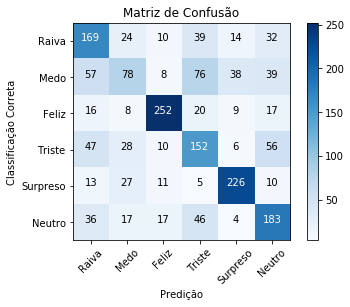

In [ ]:
import itertools
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(titulo)
plt.colorbar()
tick_marks = np.arange(len(expressoes))
plt.xticks(tick_marks, expressoes, rotation=45)
plt.yticks(tick_marks, expressoes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Classificação Correta')
plt.xlabel('Predição')
plt.savefig('matriz_confusao_mod_alt.png')
plt.show()

## Testando brevemente o modelo

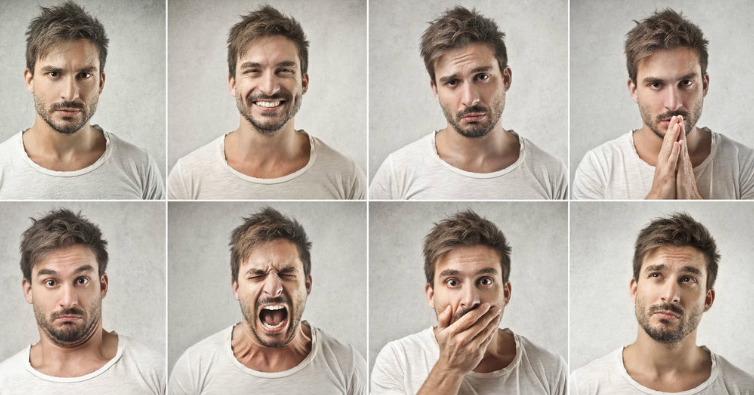

In [ ]:
imagem = cv2.imread(diretorio + "testes/teste02.jpg")
cv2_imshow(imagem)

In [ ]:
model = load_model(diretorio + "modelo_02_expressoes_alt.h5")
scores = model.evaluate(np.array(x_test), np.array(y_test), batch_size=batch_size)
print("Perda/Loss: " + str(scores[0]))
print("Acurácia: " + str(scores[1]))

1800/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

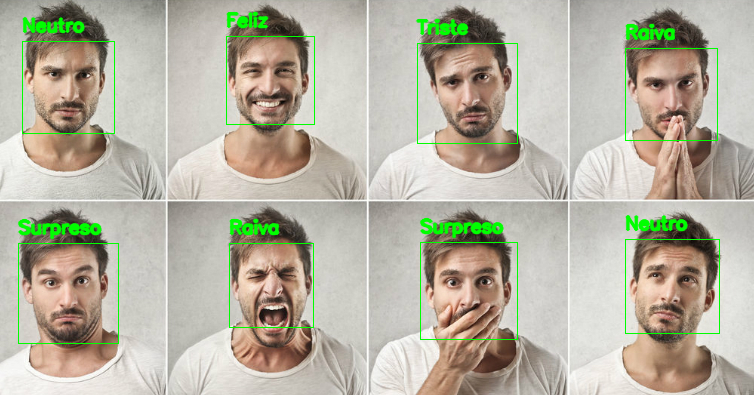

In [ ]:
expressoes = ["Raiva", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"] #"Nojo", 
original = imagem.copy()
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(diretorio + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.2, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 255, 0), 1)
    roi_gray = gray[y:y + h, x:x + w]
    roi_gray = roi_gray.astype("float") / 255.0
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, 
                  norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
    prediction = model.predict(cropped_img)[0]
    cv2.putText(original, expressoes[int(np.argmax(prediction))], (x, y - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(original)